In [ ]:
# Start writing code here...
# import

import numpy as np                      # linear algebra
import pandas as pd                     # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt         # Data Visualization 
from sklearn.cluster import KMeans      # Kmeans
import math 
from sklearn.decomposition import PCA   # PCA
from sklearn.datasets import load_digits  
from sklearn.metrics import pairwise_distances_argmin_min

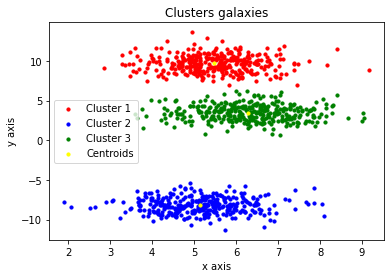

<Figure size 72x720 with 0 Axes>

In [ ]:
# read txt return data
dataset = pd.read_csv('galaxies.txt')


# kmeans
X= dataset.iloc[:, [0,1]].values
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=0)
pred = kmeansmodel.fit_predict(X)
#dataset['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
# print('Number of data points in each cluster= \n', dataset['Cluster'].value_counts())

# plot Visualizing all the clusters 
plt.scatter(X[pred  == 0, 0], X[pred  == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[pred  == 1, 0], X[pred  == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred  == 2, 0], X[pred  == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 10 , c = 'yellow', label = 'Centroids')
plt.title('Clusters galaxies')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.figure(figsize=(1,10))
plt.show()


In [ ]:
# create galaxy coordinates.. pass X, get galaxyname_df 
redgalaxydf= pd.DataFrame({'x': X[pred  == 0, 0] , 'y': X[pred  == 0, 1] })
greengalaxydf= pd.DataFrame({'x': X[pred  == 1, 0] , 'y': X[pred  == 1, 1] })
bluegalaxydf= pd.DataFrame({'x': X[pred  == 2, 0] , 'y': X[pred  == 2, 1] })


# finding maximum of all the galaxies mean
a= np.array([redgalaxydf.mean(axis=1).max(), bluegalaxydf.mean(axis=1).max(), greengalaxydf.mean(axis=1).max()])
a= a.max()

# select galaxy
def SelectGalaxy(galaxydf):
    index= galaxydf['x'].idxmax()
    return galaxydf.iloc[index]

if redgalaxydf.mean(axis=1).max() == a:
    point= SelectGalaxy(redgalaxydf)
if greengalaxydf.mean(axis=1).max() == a:
    point= SelectGalaxy(greengalaxydf)
if bluegalaxydf.mean(axis=1).max() == a:
    point= SelectGalaxy(bluegalaxydf)

# truncate to 2 decimals
def round_decimals_down(number:float, decimals:int=2):
    """
    Returns a value rounded down to a specific number of decimal places.
    """
    if not isinstance(decimals, int):
        raise TypeError("decimal places must be an integer")
    elif decimals < 0:
        raise ValueError("decimal places has to be 0 or more")
    elif decimals == 0:
        return math.floor(number)
    factor = 10 ** decimals
    return math.floor(number * factor) / factor

#co ordinates of YODA
print("Co ordinates of yoda:")
print(round_decimals_down(point[0],2),round_decimals_down(point[1],2)) 

Co ordinates of yoda:
9.16 8.8


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5c003a9-88bc-4761-b61e-147bf2ede907' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>